# Dev

- [] Fix the categorical knowledge graph

In [63]:
%load_ext autoreload
%autoreload all
%aimport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [69]:
import os
import sys
import pickle
import networkx as nx
import matplotlib as mpl
import numpy as np
import random
import matplotlib.pyplot as plt
import re
from pprint import pprint

# Add the project root directory to the system path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from StructuredRag.evaluation import graph_scoring
from StructuredRag.processing import graph_construction
from StructuredRag.algorithms import v0, v1
from StructuredRag.processing import distance_metrics

In [41]:
### Load the embedded index
run_path = 'v0/2024-05-17'

data = {}
# Read the data for the specified experiment
for item in os.listdir('../results/' + run_path):
    print('Loading item:', item.split('.')[0])
    
    with open('../results/' + run_path + '/' + item, 'rb') as f:
        data[item.split('.')[0]] = pickle.load(f)

embedded_index = data['embedded_index']

Loading item: adj_matrix
Loading item: embedded_index
Loading item: notes


# Doctype

In [3]:
### Print out all the different types of document
doc_types = []
for doc in embedded_index:
    doc_types.append(doc.metadata['Type'])

set(doc_types)

{'Background Reading', 'Essential Reading', 'Recommended reading'}

In [4]:
doc1 = embedded_index[random.randint(0, 100)]
doc2 = embedded_index[random.randint(0, 100)]

print(doc1.metadata['Type'], '||', doc2.metadata['Type'], '||', distance_metrics.doctype_distance_metric(doc1, doc2))

Essential Reading || Recommended reading || -1


In [12]:
results = []
for i in range(1000):
    doc1 = embedded_index[random.randint(0, len(embedded_index)-1)]
    doc2 = embedded_index[random.randint(0, len(embedded_index)-1)]

    results.append(
        distance_metrics.doctype_distance_metric(doc1, doc2)
    )

plt.hist(results)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

# Authors

In [13]:
doc_types = []
for doc in embedded_index:
    doc_types.append(doc.metadata['Authors'])

set(doc_types)

{'Alexis Tessier, Luc Tucker',
 'Alice Pugh',
 'Alice Pugh, Lauren Barnes, Edwin Millar',
 'Alice Pugh, Oliver Davies, Jenny Chan, Lauren Barnes, Edwin Millar',
 'Angus Foulis, Saleem Bahaj, Gabor Pinter',
 'Annalisa Stoddart',
 'David Latto, Christopher Jackson, Alex Rattan, Edward Hall',
 'David Latto, Liam Crowley-Reidy, Fergal Shortall, Maria Barriel',
 'Fabrizio Cadamagnani',
 'Fabrizio Cadamagnani, Georgina Green, Ryan Murphy',
 'Florence Hubert, Frances Hill, Louise Parreira, Alexis Tessier, Iain Duff',
 'Gabija Zemaityte, Jack Page, Sonal Patel, Mirko Licchetta, Julian Reynolds, James Own',
 'Helena Patterson, Azuolas Alisauskas, Iain Ramsay, Sean Maloney',
 'Iain Ramsay, William Hynes, Helena Patterson, Sean Maloney, Azuolas Alisauskas',
 'Ian Short',
 'James Owen, Shibo Feng, Katie Farrant, Julian Reynolds, Emil Iordanov, Edward Manual, Hamzah Abbas',
 'Jamie Satchithanantham, Rebecca Piggott, Colm Manning',
 'Jasmine Stenning, Katie Taylor, Hamzah Abbas',
 'Jenny Chan, Fergu

In [23]:
doc1 = embedded_index[random.randint(0, 100)]
doc2 = embedded_index[random.randint(0, 100)]

print(doc1.metadata['Authors'], '||', doc2.metadata['Authors'], '||', distance_metrics.author_distance_metric(doc1, doc2))

Will Dison, Shibo Feng, Julian Reynolds, Paul Alexander, Andrew Butcher, Christopher Mills || Will Dison, Shibo Feng, Julian Reynolds || 0.0


In [50]:
doc1.metadata['Authors'], doc2.metadata['Authors']

('Jasmine Stenning, Katie Taylor, Hamzah Abbas',
 'James Owen, Shibo Feng, Katie Farrant, Julian Reynolds, Emil Iordanov, Edward Manual, Hamzah Abbas')

In [24]:
results = []
for i in range(1000):
    doc1 = embedded_index[random.randint(0, len(embedded_index)-1)]
    doc2 = embedded_index[random.randint(0, len(embedded_index)-1)]

    results.append(
        distance_metrics.author_distance_metric(doc1, doc2)
    )

plt.hist(results)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

# Fix topic

In [3]:
doc_types = []
for doc in embedded_index:
    doc_types.append(doc.metadata['Topics'])

set(doc_types)

# embedded_index[0].metadata

{'Business Conditions',
 'Chartpack',
 'Financial Markets',
 'Financial Markets > Interest Rates, Policy',
 'Financial Markets > Interest Rates, Policy > Forecast, Policy > Quantitative Easing',
 'Financial Markets, International, Methodology, Policy > Forecast',
 'Financial Markets, Money and Credit > Credit Conditions',
 'GDP',
 'GDP > Near Term Outlook',
 'GDP, GDP > Near Term Outlook',
 'GDP, Inflation, International, Labour Market',
 'GDP, Inflation, Labour Market',
 'GDP, Inflation, Labour Market > Unemployment',
 'Includes Fim Data/Of Supervisory Interest',
 'Inflation',
 'Inflation > Inflation Expectations, Business Conditions',
 'Inflation, GDP',
 'Inflation, GDP, International, UK Trade, Labour Market',
 'International',
 'International > Asia and EMEs',
 'International > Asia and EMEs, International > World Activity',
 'International, International > Asia and EMEs',
 'International, International > World Activity',
 'Investment and Corporate, Labour Market, Policy',
 'Labour

In [5]:
results = []
for i in range(1000):
    doc1 = embedded_index[random.randint(0, len(embedded_index)-1)]
    doc2 = embedded_index[random.randint(0, len(embedded_index)-1)]
    
    doc1_topics = re.split('r[>,]', doc1.metadata['Topics'])
    doc2_topics = re.split('r[>,]', doc2.metadata['Topics'])
    
    results.append(
        distance_metrics.topic_distance_metric(doc1, doc2)
        # distance_metrics.fuzzy_jaccard_similarity(doc1_topics, doc2_topics, threshold=80)
    )

plt.hist(results)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [7]:
doc1 = embedded_index[random.randint(0, 100)]
doc2 = embedded_index[random.randint(0, 100)]

doc1_topics = [topic.strip() for topic in re.split(r'[>|,]', doc1.metadata['Topics'])]
doc2_topics = [topic.strip() for topic in re.split(r'[>|,]', doc2.metadata['Topics'])]


print(doc1_topics, '||', doc2_topics, '||', distance_metrics.topic_distance_metric(doc1, doc2))

['GDP', 'Inflation', 'International', 'Labour Market'] || ['Policy', 'Financial Markets', 'Interest Rates'] || -1.0


# Brands

In [118]:
doc_types = []
for doc in embedded_index:
    doc_types.append(doc.metadata['Brands'])

set(doc_types)

# embedded_index[0].metadata

{'Agency',
 'CAPD > External Forecasters',
 'CAPD > Forecast Judgements Tracker',
 'International Directorate',
 'International Directorate > Global Pulse',
 'International Directorate > International Analysis Note',
 'International Directorate > International Forecast Note',
 'MA-wide',
 'MA-wide > Bank Underground',
 'MA-wide > Note for Record',
 'MA-wide > Pre-MPC Follow Up Questions',
 'MA-wide > Research Insights',
 'MA-wide > Research Summary',
 'MASD > Balance Sheet Model Note',
 'MASD > Forecast',
 'MFAD > Quarterly Asset Price Note',
 'nan'}

In [119]:

doc1 = embedded_index[random.randint(0, len(embedded_index)-1)]
doc2 = embedded_index[random.randint(0, len(embedded_index)-1)]

doc1.metadata['Brands']

'MA-wide > Note for Record'

In [124]:
results = []
for i in range(1000):
    doc1 = embedded_index[random.randint(0, len(embedded_index)-1)]
    doc2 = embedded_index[random.randint(0, len(embedded_index)-1)]
    
    results.append(
        distance_metrics.brand_distance_metric(doc1, doc2)
        # distance_metrics.fuzzy_jaccard_similarity(doc1_topics, doc2_topics, threshold=80)
    )

plt.hist(results)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [123]:
set(results)

{-1.0, -0.334, 0, 1.0, 3.0}

In [125]:
doc1 = embedded_index[random.randint(0, 100)]
doc2 = embedded_index[random.randint(0, 100)]

doc1_brands = [brand.strip() for brand in re.split(r'[>|,]', doc1.metadata['Brands'])]
doc2_brands = [brand.strip() for brand in re.split(r'[>|,]', doc2.metadata['Brands'])]

print(doc1_brands, '||', doc2_brands, '||', distance_metrics.brand_distance_metric(doc1, doc2))

['nan'] || ['nan'] || 0


In [19]:
doc1_brands[0].lower() == 'nan'

True

# Division

In [100]:
doc_types = []
for doc in embedded_index:
    doc_types.append(doc.metadata['Divisions'])

set(doc_types)

# embedded_index[0].metadata

{'Agencies',
 'Centre for Central Bkg Studies, Research Hub',
 "Conj Ass'Ment & Projectn - Div 4",
 'Current Economic Conditions Division',
 'External Engagement Division',
 'FS, Statistics and Regulatory Data',
 'International Directorate',
 'MP COO Division',
 'Markets',
 'Markets, Monetary and Financial Conditions',
 'Monetary Analysis, International Directorate',
 'Monetary Analysis, Monetary Policy Outlook Division',
 'Monetary Policy Outlook Division',
 'Monetary Policy Outlook Division, International Directorate',
 'Monetary Policy Outlook Division, Monetary and Financial Conditions',
 'Monetary Policy Outlook Division, Prudential Policy Division',
 'Monetary and Financial Conditions',
 'Monetary and Financial Conditions, Macro-Financial Risk Division',
 'Monetary and Financial Conditions, Markets, International Directorate',
 'Research Hub',
 'Structural Economics Division'}

In [104]:
doc1 = embedded_index[random.randint(0, len(embedded_index)-1)]
doc2 = embedded_index[random.randint(0, len(embedded_index)-1)]

<function matplotlib.pyplot.show(close=None, block=None)>

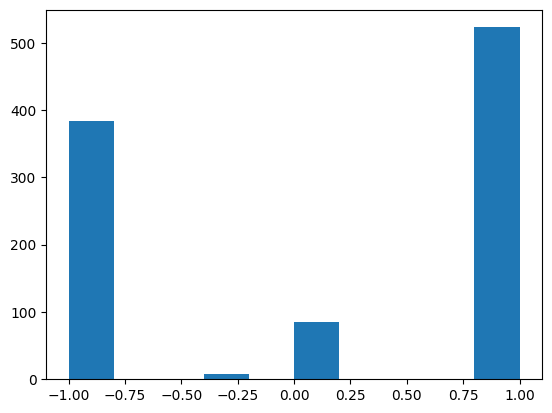

In [186]:
results = []
for i in range(1000):
    doc1 = embedded_index[random.randint(0, len(embedded_index)-1)]
    doc2 = embedded_index[random.randint(0, len(embedded_index)-1)]
    
    results.append(
        distance_metrics.division_distance_metric(doc1, doc2, fuzz_thresh=80)
    )

plt.hist(results)
plt.show

In [187]:
set(results)

{-1.0, -0.334, 0.0, 1.0}

In [153]:
doc1 = embedded_index[random.randint(0, 100)]
doc2 = embedded_index[random.randint(0, 100)]

doc1_divisions = [brand.strip() for brand in re.split(r'[>|,]', doc1.metadata['Divisions'])]
doc2_divisions = [brand.strip() for brand in re.split(r'[>|,]', doc2.metadata['Divisions'])]

# print(doc1_brands, '||', doc2_brands, '||', distance_metrics.fuzzy_jaccard_similarity(doc1_divisions, doc2_divisions,80))
print(doc1_divisions, '||', doc2_divisions, '||', distance_metrics.division_distance_metric(doc1, doc2,80))

['Markets']
0.0
['Markets'] || ['Research Hub'] || -1.0


In [132]:
print(doc1_brands, '||', doc2_brands, '||', distance_metrics.division_distance_metric(doc1, doc2,80))

0.0
['nan'] || ['nan'] || -1.0


# Other

In [188]:
embedded_index[0].metadata

{'page_label': '1',
 'file_name': 'Agencies Pay and Labour Market Survey (MPC Note - January 2020).pdf',
 'Description': 'For 2020, survey respondents expect pay settlements to remain flat at the 2.9% reported for 2019. \nIn contrast, respondents expect growth in total labour costs per employee to increase somewhat.  While the difference could partly reflect the impact of non-pay benefits and changes in the composition of the workforce, we would put more weight on the steer from the settlements responses for the outlook for pay growth. \nAs in 2019, the “Ability to recruit and retain staff” and “the National Living Wage” are driving up the growth rate of total labour costs per employee in 2020.  “Brexit Uncertainty”, “Changes in profitability” and “Economic Uncertainty” continue to pull down on the change in the growth rate of total labour costs per employee. ',
 'Type': 'Recommended reading',
 'Date': '2020-01-15 00:00:00',
 'Authors': 'Florence Hubert, Frances Hill, Louise Parreira, 